### Week 8 Assignment Programming Exercises
**Name: Jinyang Yu**  
**Date: Mar 4, 2023**

## Representation of homosexual people: a text analysis of People's Daily from 2011 to 2018

### Research Background
Representation in media can be a reflection of public attitudes toward homosexuality as well as affect people's attitudes toward homosexuality. The way in which the general public perceives homosexuality has a significant impact on the life experiences of LGBTQ individuals. Negative attitudes towards homosexuality can lead to discrimination, harassment, and even violence against LGBTQ people. China has one of the largest LGBTQ populations in the world [(Wang et al., 2019)](https://www.thelancet.com/journals/lanpub/article/PIIS2468-2667(19)30153-7/fulltext). 

### Research Question
After economic reforms, industrialization, urbanization and globalization have transformed Chinese attitudes toward a wide variety of social issues, including homosexuality [(Xie & Peng, 2018)](https://www.tandfonline.com/doi/full/10.1080/00918369.2017.1386025). On the other hand, it is observed that after President Xi came to power, the Chinese government imposed harsher restrictions against LGBTQ groups.  
What's the representation of homosexual people in People's Daily?  
How the representation of homosexual people in People's Daily changed over time?

### Data
For this project, data was collected from articles published in People's Daily that pertain to the topic of homosexuality (using the keyword 'homosexuality', _tongxinglian_, 同性恋). Due to limited time, this project only use articles from the first 4 pages of the search result (39 in total). There are 13 pages in total of articles containing the keyword homosexuality.

#### 1. Import libraries

In [1]:
import re #regular expression
from bs4 import BeautifulSoup #html parser
import pandas as pd #dataframe
import glob, os #retrieve files/pathnames matching a specified pattern
import seaborn as sns #visualization library
import matplotlib
import matplotlib.pyplot as plt #plotting
import matplotlib.font_manager #font of plots
import jieba #chinese word cutting

#### 2. Generate a dataframe with an entry for each article

In [2]:
path= '/Users/jinyang/Documents/Data/peoplesdaily'
os.chdir(path) # directory of text files
filelist = glob.glob("*.html")

articles = []

for file in filelist:
    f = open(file, "r", encoding="utf-8")
    html = f.read()
    soup = BeautifulSoup(html, 'html.parser')
    for div in soup.find_all('div', {'class': 'detail'}):
        title = div.find('h2').get_text()
        date_match = re.search(r'时间：(\d{4}-\d{2}-\d{2})', div.get_text())
        date = date_match.group(1)
        body = div.find('div', {'class': 'detail-p'}).get_text().strip()
        articles.append({'Title': title, 'Date': date, 'Body': body})

df = pd.DataFrame(articles)

In [3]:
df = df.sort_values(by='Date')
df

,Title,Date,Body
13,跛鸭国会忙立法 政治焦虑难掩饰(国际视点),2010-12-21,12月17日，美国总统奥巴马（中）在首都华盛顿签署减税延期妥协法案。 新华社发本报驻美国记...
12,让高危人群浮出水面（聚焦·艾滋病防治深度观察④）,2010-12-23,朱慧卿绘（人民图片）本报记者 王君平 “防艾是一场战争，打仗就要攻其要害。艾滋病首先在高危...
11,制作不雅视频舰长被解职,2011-01-06,本报华盛顿1月4日电 （记者张旸）制作并播放不雅视频的美国核动力航母“企业”号舰长欧文·霍诺...
10,池莉的城（一瞥）,2011-03-25,虞金星 中篇小说《她的城》 池莉著 《中国作家》2011年第1期 很难讲文中主角是谁。是...
9,2010年美国的人权纪录,2011-04-11,国务院新闻办公室 2011年4月10日 2011年4月8日，美国国务院发表《2010年国...
32,释放烦恼和压力之夜(第一现场),2011-11-02,万圣夜化装大游行的游客们扮演成各种形象。陈一鸣摄本报驻美国记者 陈一鸣 夕阳洒下最后一抹...
31,创新离不开宽容（金台论道）,2011-11-04,张 贺 “有影响的精品力作还不够多，文化产品创作生产引导力度需要加大。”《中共中央关于深...
30,萧乾与福斯特（跋与藏）,2011-11-20,李 辉 第一次知道英国作家福斯特（E.M.Forster）的名字，是读他的《小说面面观》...
29,靠近我，别害怕（暖流）,2011-11-30,本报记者 朱 虹 “昆虫叮咬真的不会传染艾滋病吗？”“不会，除非3000只蚊子同时咬了...
37,流动人口“艾”情紧急(聚焦·艾滋病防治新观察②),2011-12-15,日前，安徽省淮北市医务人员在建筑工地为农民工讲解艾滋病预防知识。 人民图片本报记者 李晓宏...


#### 3. Divide articles into two year groups

Articles from the first four pages date from Dec 2010 to 2018. To do a comparison, this project divide articles into two year groups: 2011-2014, 2015-2018.

In [4]:
mask1 = (df['Date'] >= '2011-01-01') & (df['Date'] <= '2014-12-31')
mask2 = (df['Date'] >= '2015-01-01') & (df['Date'] <= '2018-12-31')
df1 = df[mask1]
df2 = df[mask2]

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
year_counts = df.groupby(df['Date'].dt.year)['Title'].count()
y_c=year_counts.drop(labels=2010)

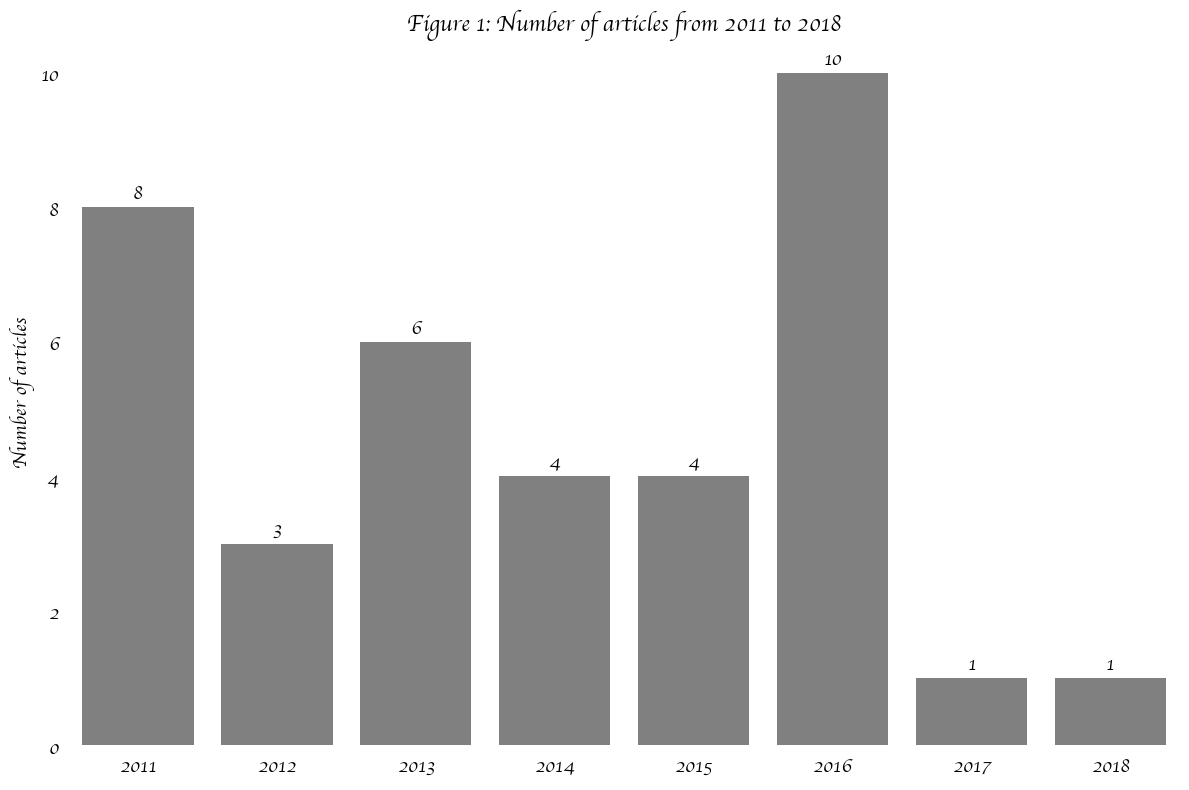

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=y_c.index, y=y_c.values, color='grey')
ax.set_facecolor('white') #set background as white

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#label the frequency on the top of each bar
for i, bar in enumerate(ax.containers):
    heights = [b.get_height() for b in bar]
    for j, height in enumerate(heights):
        ax.annotate(int(heights[j]), xy=(bar[j].get_x()+ bar[j].get_width() / 2, heights[j]),
                    xytext=(0, 0), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14,family='cursive')
    
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(fontsize=14, family='cursive') #set font and size of year on x-axis

plt.ylabel('Number of articles', fontsize=14, family='cursive') #set y-label
plt.yticks(fontsize=14, family='cursive') #set font and size of year on x-axis

plt.title("Figure 1: Number of articles from 2011 to 2018",family='cursive', size= 16, weight='bold')

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tight_layout() #make sure the layout is efficient

#### 4. Cut words

In [7]:
text1=df1['Body'].to_string()
words1 =jieba.cut(text1)
word_list1 = []
for word1 in words1:
    word_list1.append(word1)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/zj/0n68ddwj13s62557809lw1200000gn/T/jieba.cache
Loading model cost 0.410 seconds.
Prefix dict has been built successfully.


In [8]:
stopwords = [line.strip() for line in open('/Users/jinyang/Documents/Data/stopwords-master/baidu_stopwords.txt', 'r', encoding='UTF-8').readlines()]
wordcounts1 = {}
for word in word_list1:
    if len(word) == 1:
        continue
    if word in stopwords:
        continue
    if word.isnumeric():
        continue
    if word == '...' or word== '本报' or word == '本报记者' or word == '日电':
        continue
    else:
        wordcounts1[word]=wordcounts1.get(word, 0) + 1

In [33]:
top_words1 = sorted(wordcounts1.items(), key=lambda x: x[1], reverse=True)[:10]
words1 = [x[0] for x in top_words1]
freqs1 = [x[1] for x in top_words1]
words_eng1=['Journalist','AIDS','United States','Writer','Xinhua News \n Agency',
           'Washington', 'Yiming Chen', 'Recently', 'Movie','Audience']

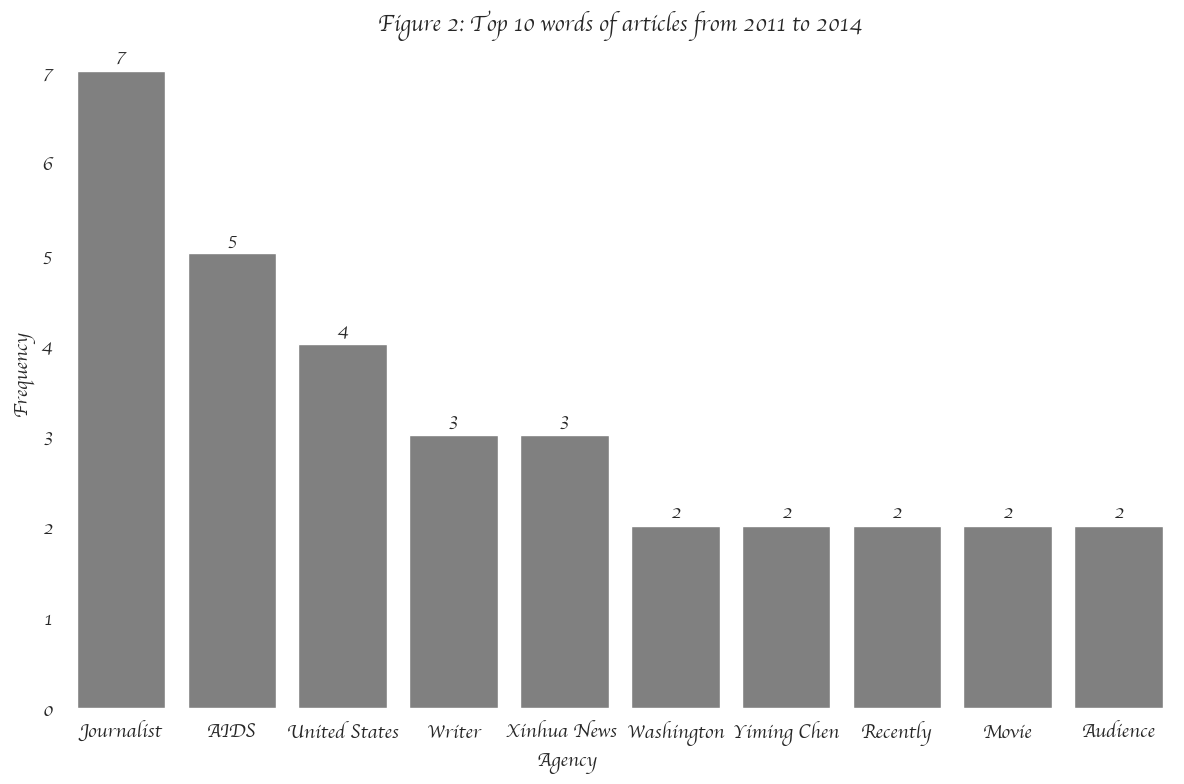

In [36]:
matplotlib.rcParams['font.family'] = ['Heiti TC'] #Show Chinese label

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=words_eng1, y=freqs1, color='grey')
ax.set_facecolor('white') #set background as white

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#label the frequency on the top of each bar
for i, bar in enumerate(ax.containers):
    heights = [b.get_height() for b in bar]
    for j, height in enumerate(heights):
        ax.annotate(int(heights[j]), xy=(bar[j].get_x()+ bar[j].get_width() / 2, heights[j]),
                    xytext=(0, 0), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14,family='cursive')
        
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(fontsize=14,family='cursive') #set font and size of year on x-axis

plt.ylabel('Frequency', fontsize=14,family='cursive') #set y-label
plt.yticks(fontsize=14,family='cursive') #set font and size of year on x-axis

plt.title("Figure 2: Top 10 words of articles from 2011 to 2014",size= 16,family='cursive', weight='bold')

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tight_layout() #make sure the layout is efficient

In [37]:
import jieba
text2=df2['Body'].to_string()
words2 =jieba.cut(text2)
word_list2 = []
for word in words2:
    word_list2.append(word)
wordcounts2 = {}
for word in word_list2:
    if len(word) == 1:
        continue
    if word in stopwords:
        continue
    if word.isnumeric():
        continue
    if word == '...' or word== '本报' or word == '本报记者' or word == '日电':
        continue
    else:
        wordcounts2[word]=wordcounts2.get(word, 0) + 1
top_words2 = sorted(wordcounts2.items(), key=lambda x: x[1], reverse=True)[:10]
words2 = [x[0] for x in top_words2]
freqs2 = [x[1] for x in top_words2]
words_eng2=['United States','Journalist','Women Book','Media','Recently','AIDS',
           'One', 'Picture is...', 'January','Washington\n post']

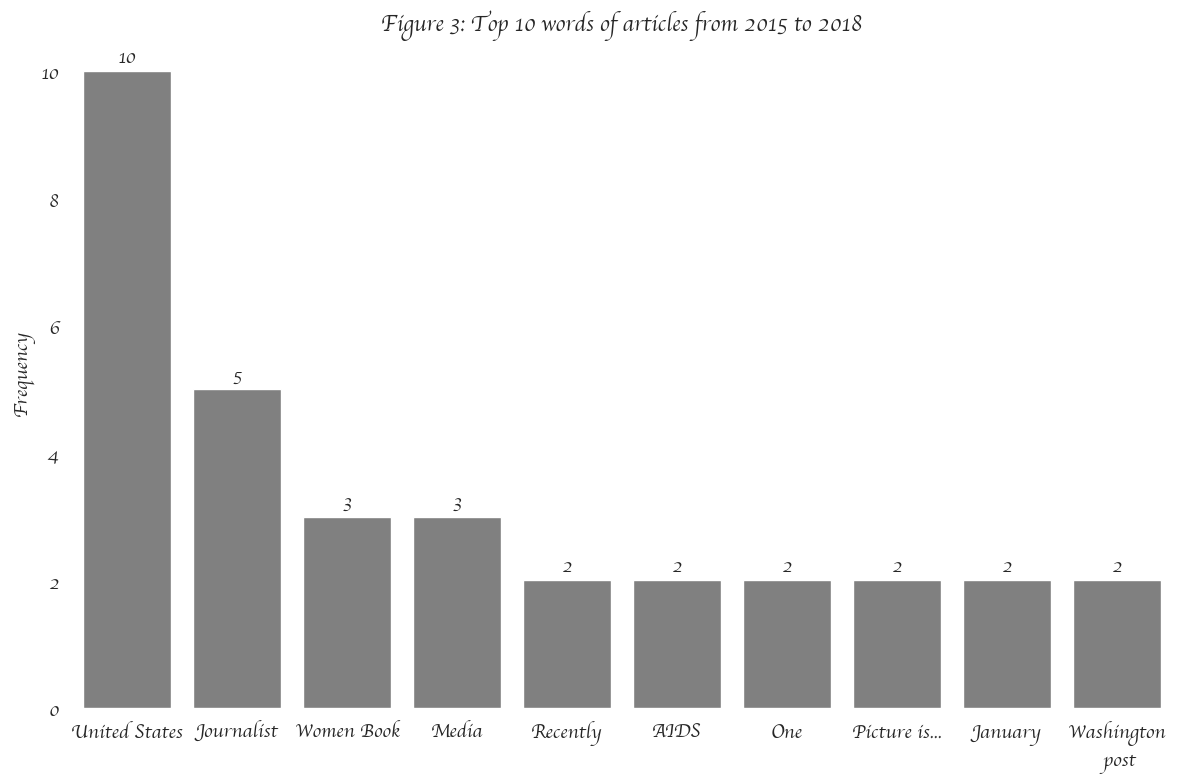

In [38]:
matplotlib.rcParams['font.family'] = ['Heiti TC'] #Show Chinese label

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=words_eng2, y=freqs2, color='grey')
ax.set_facecolor('white') #set background as white

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#label the frequency on the top of each bar
for i, bar in enumerate(ax.containers):
    heights = [b.get_height() for b in bar]
    for j, height in enumerate(heights):
        ax.annotate(int(heights[j]), xy=(bar[j].get_x()+ bar[j].get_width() / 2, heights[j]),
                    xytext=(0, 0), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14,family='cursive')
        
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(fontsize=14,family='cursive') #set font and size of year on x-axis

plt.ylabel('Frequency', fontsize=14,family='cursive') #set y-label
plt.yticks(fontsize=14,family='cursive') #set font and size of year on x-axis

plt.title("Figure 3: Top 10 words of articles from 2015 to 2018",size= 16,family='cursive', weight='bold')

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tight_layout() #make sure the layout is efficient

### Interpretation
Number of articles mentioning homosexuality from 2011 to 2014 is more than that from 2015 to 2018, indicating attention towards homosexuality has reduced. From 2011 to 2014, homosexuality is most frequently linked with AIDS and United States. From 2015 to 2018, homosexuality is most frequently linked with United States. The focus of discussions around homosexuality has shifted from a medical context, primarily centered around AIDS, to a country-specific context, with an emphasis on criticising the United States.